<a href="https://colab.research.google.com/github/nlan082/BAINHOM/blob/main/BOTTLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ppduyn/bottle")

print("Path to dataset files:", path)

100%|██████████| 1.47M/1.47M [00:00<00:00, 1.93MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ppduyn/bottle/versions/1


In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import kagglehub

image_size = 64
dishes_classes = ['khong nap','mat nhan','mop meo']

data, labels = [], []

# Print the downloaded dataset path to verify its location
print("Dataset path:", path)

for i, dishes in enumerate(dishes_classes):
    # Construct the folder path using os.path.join to ensure platform compatibility
    folder = os.path.join(path, 'water bottle', 'NG', dishes)

    # Print the folder path to verify its correctness
    print("Checking folder:", folder)

    # Check if the folder exists before trying to access it
    if os.path.exists(folder):
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (image_size, image_size))
                img = img / 255.0
                data.append(img)
                labels.append(i)
            except Exception as e:
                print(f"Error processing image {filename}: {e}")
    else:
        print(f"Folder not found: {folder}")

data = np.array(data)
labels = to_categorical(labels, num_classes=len(dishes_classes))

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Dataset path: /root/.cache/kagglehub/datasets/ppduyn/bottle/versions/1
Checking folder: /root/.cache/kagglehub/datasets/ppduyn/bottle/versions/1/water bottle/NG/khong nap
Folder not found: /root/.cache/kagglehub/datasets/ppduyn/bottle/versions/1/water bottle/NG/khong nap
Checking folder: /root/.cache/kagglehub/datasets/ppduyn/bottle/versions/1/water bottle/NG/mat nhan
Checking folder: /root/.cache/kagglehub/datasets/ppduyn/bottle/versions/1/water bottle/NG/mop meo


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(528, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(dishes_classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

model.save('model.h5')

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0.5902 - loss: 1.3578 - val_accuracy: 0.5556 - val_loss: 0.9348
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.5567 - loss: 0.7582 - val_accuracy: 0.4444 - val_loss: 0.7820
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6371 - loss: 0.7854 - val_accuracy: 0.5556 - val_loss: 0.7699
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.5402 - loss: 0.8147 - val_accuracy: 0.5556 - val_loss: 0.7868
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.6437 - loss: 0.7761 - val_accuracy: 0.5556 - val_loss: 0.7387
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.7190 - loss: 0.6642 - val_accuracy: 0.5556 - val_loss: 0.6971
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.5584 - loss: 0.7051 - val_accuracy: 0.6667 - val_loss: 0.7053
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.5688 - loss: 0.6461 - val_accuracy: 0.5556 - val_loss:

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:04<00:00, 33.0MB/s]



0: 640x352 1 bottle, 1 vase, 5406.7ms
Speed: 15.2ms preprocess, 5406.7ms inference, 30.0ms postprocess per image at shape (1, 3, 640, 352)


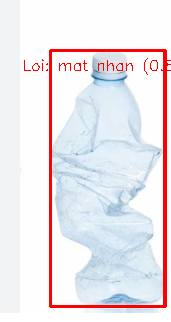

In [9]:
from ultralytics import YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

IMG_PATH = "/content/mopmeo.png"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
DEFECT_MODEL_PATH = "/content/model.h5"

yolo_model = YOLO(YOLO_MODEL_PATH)
defect_model = load_model(DEFECT_MODEL_PATH)

defect_classes = ['khong nap', 'mat nhan', 'mop meo']

def check_defect(img_crop):
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255
        x = img.reshape(1, 64, 64, 3)
        preds = defect_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return defect_classes[idx], conf
    except:
        return "Error", 0

img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = check_defect(crop)
        if label in defect_classes and conf >= 0.6:
            result_text = f"Loi: {label} ({conf:.2f})"
            color = (0, 0, 255)
        else:
            result_text = " Đạt yêu cầu"
            color = (0, 255, 0)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        text_size = cv2.getTextSize(result_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)[0]
        text_x = x1 + (x2 - x1 - text_size[0]) // 2
        text_y = y1 + 20
    cv2.putText(img_draw, result_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    cv2_imshow(img_draw)


0: 640x384 1 bottle, 1 dining table, 2894.6ms
Speed: 3.7ms preprocess, 2894.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 384)


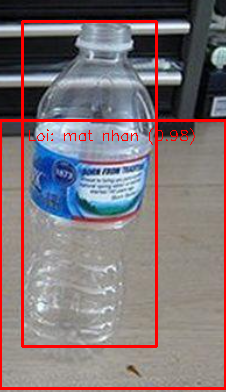

In [10]:

IMG_PATH = "/content/khongnap.png"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
DEFECT_MODEL_PATH = "/content/model.h5"

yolo_model = YOLO(YOLO_MODEL_PATH)
defect_model = load_model(DEFECT_MODEL_PATH)

defect_classes = ['khong nap', 'mat nhan', 'mop meo']

def check_defect(img_crop):
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255
        x = img.reshape(1, 64, 64, 3)
        preds = defect_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return defect_classes[idx], conf
    except:
        return "Error", 0

img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = check_defect(crop)
        if label in defect_classes and conf >= 0.6:
            result_text = f"Loi: {label} ({conf:.2f})"
            color = (0, 0, 255)
        else:
            result_text = " Đạt yêu cầu"
            color = (0, 255, 0)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        text_size = cv2.getTextSize(result_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)[0]
        text_x = x1 + (x2 - x1 - text_size[0]) // 2
        text_y = y1 + 20
    cv2.putText(img_draw, result_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    cv2_imshow(img_draw)